In [14]:
from random import expovariate
from matplotlib.pyplot import *
from random import seed
from math import inf as Infinity
from statistics import mean

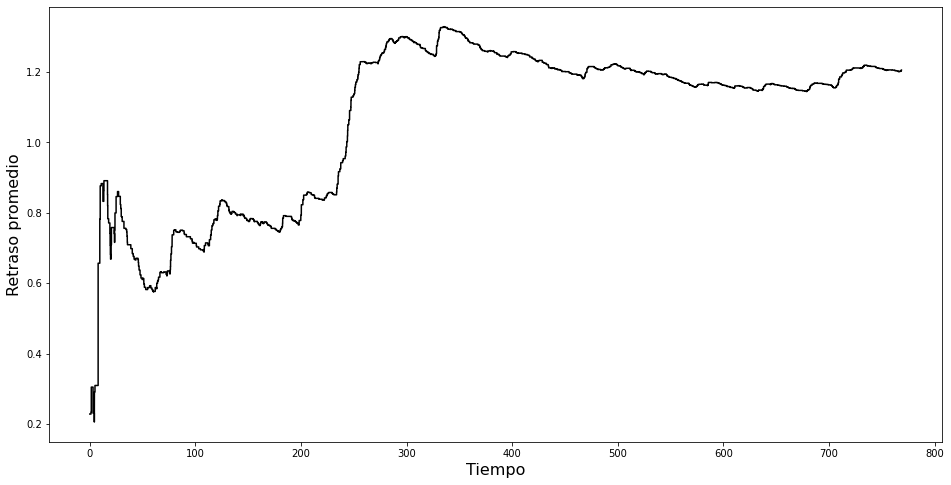

Retraso promedio =  1.2054


In [51]:
# Parametros

lamda = 1.3                         # Razón de arrivos (1/Lambda)  Ojo
mu = 2.0                            # Razón de salida (1/Mu)       Ojo


Num_Pkts = 1000                   # Numero de paquetes a simular
#T = 100000
count = 0                           # Contador de paquetes simulados
t = 0
N = 0                               # Variable de estado: numero de paquetes en el sistema

tll = expovariate(lamda)            # Tiempo de llegada
ts = Infinity                       # Tiempo de salida

X = []
Y = []

# Variables de salida
tll_Data = []                       # Lista de tiempos de llegada
ts_Data = []                        # Lista de tiempos de salida
r_Data = []                         # Lista de retrasos individuales

while count < Num_Pkts:
#while t < T:
    if tll < ts:                           # Evento de llegada
        t = tll
        tll_Data.append(t)
        N = N + 1.0
        tll = t + expovariate(lamda) 
        if N == 1:
            ts = t + expovariate(mu)
        if len(X)<Num_Pkts:
            X.append(t)
    else:                                         # Evento de salida
        t = ts 
        ts_Data.append(t)
        N = N - 1.0
        count = count + 1                         # Paquetes simulados
        if N > 0:
            ts = t + expovariate(mu)
        else:
            ts = Infinity
    
            
# Estimación del retraso promedio:

for i in range(Num_Pkts):
#for i in range(T):
    d = ts_Data[i] - tll_Data[i]
    r_Data.append(d)
    Y.append(mean(r_Data))

fig = figure(1, figsize=(16, 8))
step(X, Y, color='black', where = 'post')
xlabel('Tiempo', size=16)
ylabel('Retraso promedio', size=16)
show()

print( "Retraso promedio = ", round( mean(r_Data), 4) )